<a href="https://colab.research.google.com/github/hasanj0n/Data_Science/blob/main/Aviacompany_customer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aviakompaniya yo'lovchilarining qoniqishi

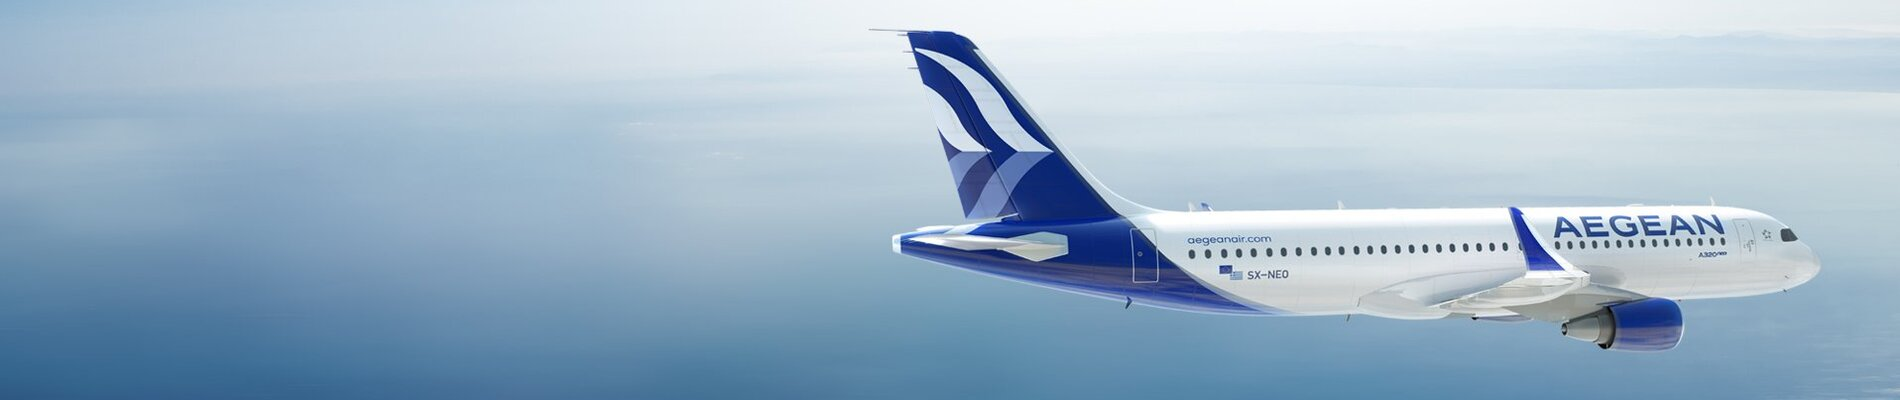

Tarkib:

**Gender:** yo'lovchilarning jinsi (ayol, erkak)

**Customer Type:** mijoz turi (sodiq mijoz, ishonchsiz mijoz)

**Age:** yo'lovchilarning haqiqiy yoshi

**Type of Travel:** yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)

**Class:** yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)

**Flight distance:** Ushbu sayohatning parvoz masofasi

**Inflight wifi service:** Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)

**Departure/Arrival time convenient:** Ketish/Kelish vaqtining qoniqish darajasi

**Ease of Online booking:** Onlayn bron qilishdan qoniqish darajasi

**Gate location:** Darvoza joylashuvidan qoniqish darajasi

**Food and drink:** Oziq-ovqat va ichimlikdan qoniqish darajasi

**Online boarding:** Onlayn bortdan qoniqish darajasi

**Seat comfort:** O'rindiqning qulayligidan qoniqish darajasi

**Inflight entertainment:** Parvoz ichidagi o'yin-kulgidan qoniqish darajasi

**On-board service:** Bort xizmatidan qoniqish darajasi

**Leg room service:** oyoq xonasi xizmatidan qoniqish darajasi

Baggage handling: bagajni tashishdan qoniqish darajasi

Check-in service: Ro'yxatdan o'tish xizmatidan qoniqish darajasi

Inflight service: Parvoz ichidagi xizmatdan qoniqish darajasi

**Cleanliness:** Tozalikdan qoniqish darajasi

**Departure Delay in Minutes:** jo‘nash vaqtida kechikish daqiqalari

**Arrival Delay in Minutes:** yetib kelganda kechikish daqiqalari

**Satisfaction:** Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

### Kerakli kutubxonalarni import qilish

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [125]:
# !git clone https://github.com/hasanj0n/Datasets/

In [126]:
train_set = pd.read_csv("/content/Datasets/Aviakompaniya/train_dataset.csv", index_col=0)
test_x = pd.read_csv("/content/Datasets/Aviakompaniya/test_dataset.csv", index_col=0)
train_set

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,2,...,4,4,1,4,4,4,3,21,12.0,0
9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,3,...,4,4,4,4,3,4,3,37,38.0,1


In [127]:
test_x

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Male,Loyal Customer,26,Business travel,Business,2949,3,3,4,3,...,4,4,1,4,2,3,1,4,29,36.0
3997,Female,Loyal Customer,23,Personal Travel,Eco,268,1,3,0,3,...,2,2,3,2,4,2,3,2,0,0.0
3998,Male,Loyal Customer,38,Business travel,Eco,602,2,1,1,1,...,2,2,1,1,2,2,3,2,23,45.0


In [128]:
test_x.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [129]:
test_x[["Arrival Delay in Minutes"]]=test_x[["Arrival Delay in Minutes"]].fillna(test_x["Arrival Delay in Minutes"].mean())

In [130]:
train_set.Gender.value_counts()/len(df)*100

Female    54.490829
Male      50.927683
Name: Gender, dtype: float64

In [131]:
train_set["Customer Type"].value_counts()

Loyal Customer       8307
disloyal Customer    1693
Name: Customer Type, dtype: int64

In [132]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [133]:
train_set.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [134]:
train_set.duplicated().sum()

486

In [135]:
def drop_nan_duplicated(df):
  df.dropna(inplace=True)
  df.drop_duplicates(inplace=True)
  return df

In [136]:
drop_nan_duplicated(train_set)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,2,...,4,4,1,4,4,4,3,21,12.0,0
9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,3,...,4,4,4,4,3,4,3,37,38.0,1


In [137]:
train_set.corrwith(train_set.satisfaction)

<ipython-input-137-7c1088cfef39>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.corrwith(train_set.satisfaction)


Age                                  0.142886
Flight Distance                      0.301944
Inflight wifi service                0.279137
Departure/Arrival time convenient   -0.068787
Ease of Online booking               0.165137
Gate location                        0.009709
Food and drink                       0.210437
Online boarding                      0.502763
Seat comfort                         0.343642
Inflight entertainment               0.401558
On-board service                     0.324537
Leg room service                     0.325264
Baggage handling                     0.247467
Checkin service                      0.232788
Inflight service                     0.240536
Cleanliness                          0.312169
Departure Delay in Minutes          -0.043405
Arrival Delay in Minutes            -0.048312
satisfaction                         1.000000
dtype: float64

In [138]:
train_x = train_set.drop("satisfaction", axis=1)
train_y = train_set.satisfaction

In [139]:
test_x

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,...,1,5,4,4,1,3,3,5,0,0.0
5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,...,5,5,4,5,4,5,5,5,130,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Male,Loyal Customer,26,Business travel,Business,2949,3,3,4,3,...,4,4,1,4,2,3,1,4,29,36.0
3997,Female,Loyal Customer,23,Personal Travel,Eco,268,1,3,0,3,...,2,2,3,2,4,2,3,2,0,0.0
3998,Male,Loyal Customer,38,Business travel,Eco,602,2,1,1,1,...,2,2,1,1,2,2,3,2,23,45.0


In [140]:
train_y

id
1        0
2        1
3        0
4        1
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    1
Name: satisfaction, Length: 9486, dtype: int64

In [141]:
train_x=pd.get_dummies(train_x)

In [142]:
test_x=pd.get_dummies(test_x)

In [143]:
train_x.corrwith(train_y).abs().sort_values(ascending=False)

Class_Business                       0.528172
Online boarding                      0.502763
Type of Travel_Business travel       0.483667
Type of Travel_Personal Travel       0.483667
Class_Eco                            0.480098
Inflight entertainment               0.401558
Seat comfort                         0.343642
Leg room service                     0.325264
On-board service                     0.324537
Cleanliness                          0.312169
Flight Distance                      0.301944
Inflight wifi service                0.279137
Baggage handling                     0.247467
Inflight service                     0.240536
Checkin service                      0.232788
Food and drink                       0.210437
Customer Type_Loyal Customer         0.178927
Customer Type_disloyal Customer      0.178927
Ease of Online booking               0.165137
Age                                  0.142886
Class_Eco Plus                       0.103355
Departure/Arrival time convenient 

In [144]:
train_x.corrwith(train_y).abs().sort_values(ascending=False).index

Index(['Class_Business', 'Online boarding', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Inflight entertainment',
       'Seat comfort', 'Leg room service', 'On-board service', 'Cleanliness',
       'Flight Distance', 'Inflight wifi service', 'Baggage handling',
       'Inflight service', 'Checkin service', 'Food and drink',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Ease of Online booking', 'Age', 'Class_Eco Plus',
       'Departure/Arrival time convenient', 'Arrival Delay in Minutes',
       'Departure Delay in Minutes', 'Gate location', 'Gender_Male',
       'Gender_Female'],
      dtype='object')

### Machine Learning

#### Logistic regression


In [145]:
# Model training
LR_model = LogisticRegression()
LR_model.fit(train_x, train_y)

# Model evaluation
y_pred = LR_model.predict(test_x)
# print(metrics.classification_report(test_y, y_pred))
# print("Model Accuracy:", metrics.accuracy_score(test_y,y_pred))

# ## confusion matrix
# conf_mat = metrics.confusion_matrix(test_y, y_pred)
# sns.heatmap(conf_mat, annot=True,fmt="g")
# plt.show()

# ## ROC curve
# fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
# display.plot()
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Support Vector Machine

In [146]:
# Model training
svm_model = SVC()
svm_model.fit(train_x, train_y)

# Model evaluation
y_pred = svm_model.predict(test_x)
# print(metrics.classification_report(test_y, y_pred))
# print("Model Accuracy:", metrics.accuracy_score(test_y,y_pred))

# ## confusion matrix
# conf_mat = metrics.confusion_matrix(test_y, y_pred)
# sns.heatmap(conf_mat, annot=True,fmt="g")
# plt.show()

# ## ROC curve
# fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
# display.plot()
# plt.show()

#### Decision Tree

In [147]:
# Model training
tree_model = DecisionTreeClassifier()
tree_model.fit(train_x, train_y)

# Model evaluation
y_pred = tree_model.predict(test_x)
# print(metrics.classification_report(test_y, y_pred))
# print("Model Accuracy:", metrics.accuracy_score(test_y,y_pred))

# ## confusion matrix
# conf_mat = metrics.confusion_matrix(test_y, y_pred)
# sns.heatmap(conf_mat, annot=True,fmt="g")
# plt.show()

# ## ROC curve
# fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
# display.plot()
# plt.show()

In [148]:
# cols = train_x.columns

# plt.figure(figsize=(30,20))
# plot_tree(tree_model, feature_names=cols, filled=True)
# plt.show()

#### Random Forest

In [149]:
# Model training
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(train_x, train_y)

# Model evaluation
y_pred = RF_model.predict(test_x)
# print(metrics.classification_report(test_y, y_pred))
# print("Model Accuracy:", metrics.accuracy_score(test_y,y_pred))

# ## confusion matrix
# conf_mat = metrics.confusion_matrix(test_y, y_pred)
# sns.heatmap(conf_mat, annot=True,fmt="g")
# plt.show()

# ## ROC curve
# fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
# display.plot()
# plt.show()

#### XGB model

In [150]:
# Model training
xgb_model = XGBClassifier()
xgb_model.fit(train_x, train_y)

# Model evaluation
y_pred = xgb_model.predict(test_x)
# print(metrics.classification_report(test_y, y_pred))
# print("Model Accuracy:", metrics.accuracy_score(test_y,y_pred))

# ## confusion matrix
# conf_mat = metrics.confusion_matrix(test_y, y_pred)
# sns.heatmap(conf_mat, annot=True,fmt="g")
# plt.show()

# ## ROC curve
# fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
# display.plot()
# plt.show()

In [153]:
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [156]:
answer = pd.DataFrame(y_pred, index=np.arange(1,4001), columns=["satisfaction"])
answer

,satisfaction
1,0
2,1
3,1
4,1
5,1
...,...
3996,1
3997,0
3998,0
3999,1


In [157]:
answer.index.name = "id"

In [158]:
answer

,satisfaction
id,
1,0
2,1
3,1
4,1
5,1
...,...
3996,1
3997,0
3998,0


In [160]:
answer.to_csv("avia_customer_satisfaction.csv")